### This notebook is a continuation from KMeans result done for USA Arrest Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from xgboost import to_graphviz
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report,plot_roc_curve

In [2]:
df = pd.read_csv("usaarrestlabeled.csv")

In [3]:
df

,Murder,Assault,UrbanPop,Rape,Segment K-means
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,2
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Murder           50 non-null     float64
 1   Assault          50 non-null     float64
 2   UrbanPop         50 non-null     float64
 3   Rape             50 non-null     float64
 4   Segment K-means  50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [5]:
df.shape

(50, 5)

In [6]:
df.isnull().sum()

Murder             0
Assault            0
UrbanPop           0
Rape               0
Segment K-means    0
dtype: int64

In [7]:
df.rename(mapper={'Segment K-means':'Label'},axis=1,inplace=True)

In [8]:
df

,Murder,Assault,UrbanPop,Rape,Label
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,2
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,1


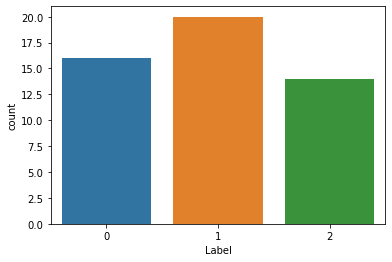

In [9]:
sns.countplot(x=df.Label,data=df)
plt.show()

In [10]:
df.corr()

,Murder,Assault,UrbanPop,Rape,Label
Murder,1.000000,0.801873,0.069573,0.563579,-0.115872
Assault,0.801873,1.000000,0.258872,0.665241,-0.209806
UrbanPop,0.069573,0.258872,1.000000,0.411341,-0.584450
Rape,0.563579,0.665241,0.411341,1.000000,-0.223727
Label,-0.115872,-0.209806,-0.584450,-0.223727,1.000000


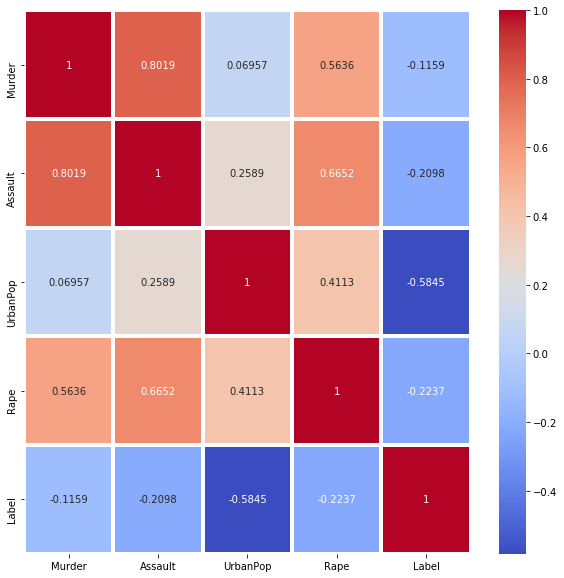

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=3)
plt.show()

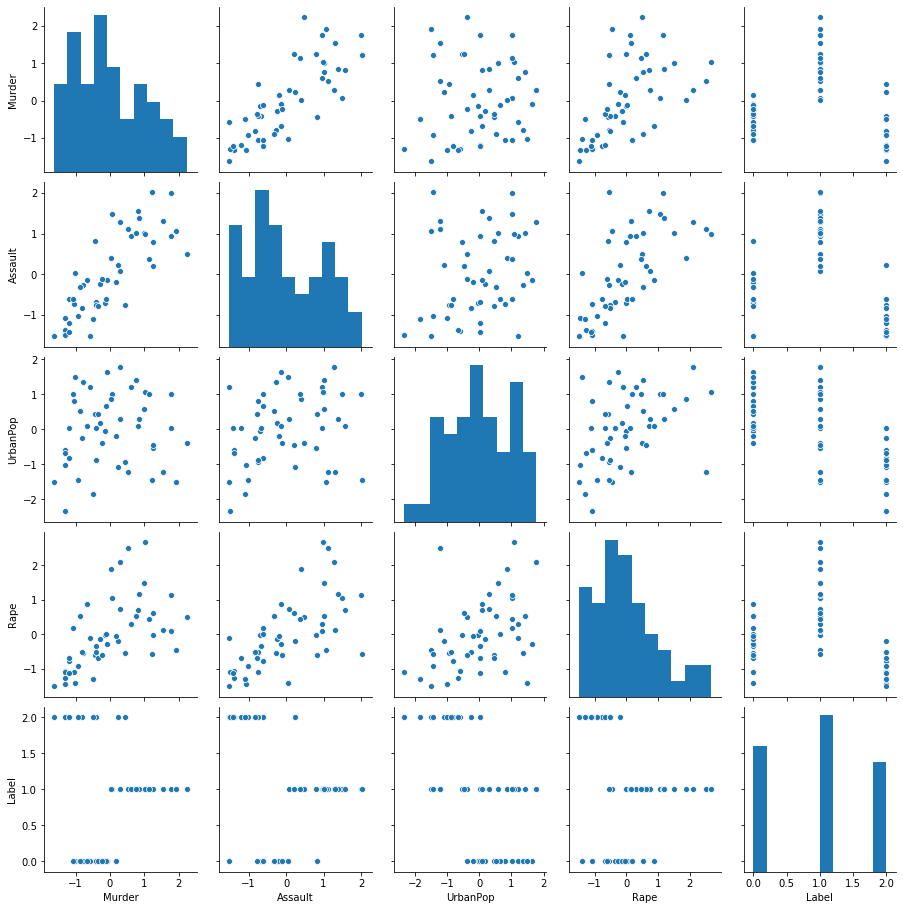

In [12]:
sns.pairplot(df)
plt.show()

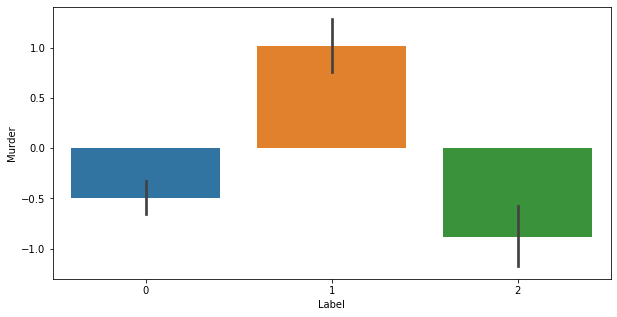

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Label,y=df.Murder,data=df)
plt.show()

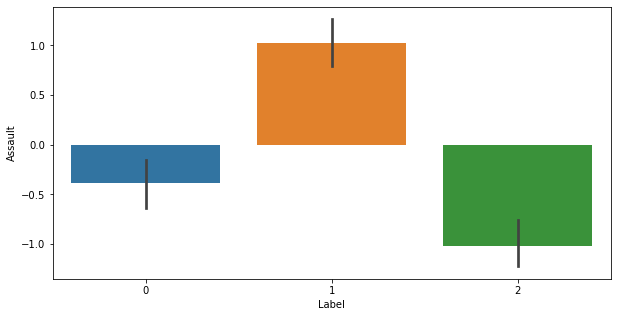

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Label,y=df.Assault,data=df)
plt.show()

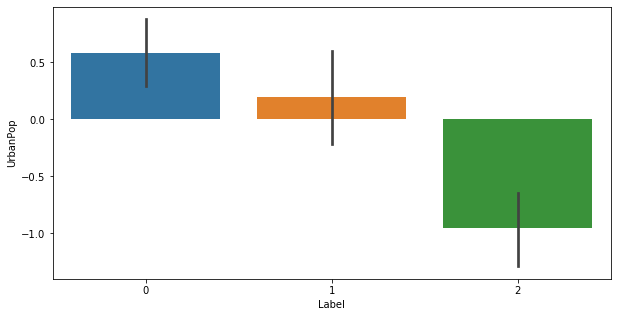

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Label,y=df.UrbanPop,data=df)
plt.show()

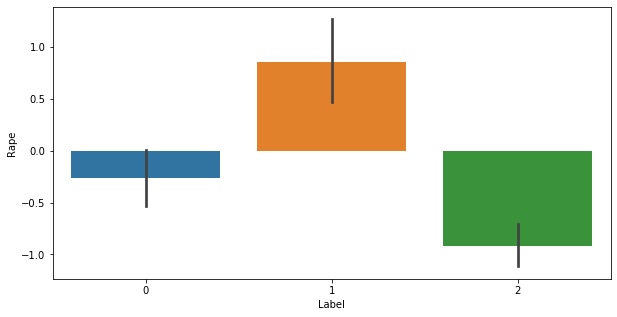

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Label,y=df.Rape,data=df)
plt.show()

In [17]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [18]:
X.values, y.values

(array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
        [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
        [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
        [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
        [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
        [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
        [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
        [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
        [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
        [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
        [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
        [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
        [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
        [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
        [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
        [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
        

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.shape, X_test.shape

((40, 4), (10, 4))

In [21]:
xgbmodel = XGBClassifier(objective='multi:softmax',random_state=0,n_estimators=200)

In [22]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=10,eval_metric='merror')

[0]	validation_0-merror:0.3
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.3
[2]	validation_0-merror:0.3
[3]	validation_0-merror:0.3
[4]	validation_0-merror:0.3
[5]	validation_0-merror:0.3
[6]	validation_0-merror:0.3
[7]	validation_0-merror:0.3
[8]	validation_0-merror:0.3
[9]	validation_0-merror:0.3
[10]	validation_0-merror:0.2
[11]	validation_0-merror:0.2
[12]	validation_0-merror:0.2
[13]	validation_0-merror:0.2
[14]	validation_0-merror:0.2
[15]	validation_0-merror:0.2
[16]	validation_0-merror:0.2
[17]	validation_0-merror:0.2
[18]	validation_0-merror:0.2
[19]	validation_0-merror:0.2
[20]	validation_0-merror:0.2
Stopping. Best iteration:
[10]	validation_0-merror:0.2



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
y_pred = xgbmodel.predict(X_test)

In [24]:
y_pred

array([2, 0, 2, 1, 1, 1, 0, 1, 2, 1], dtype=int64)

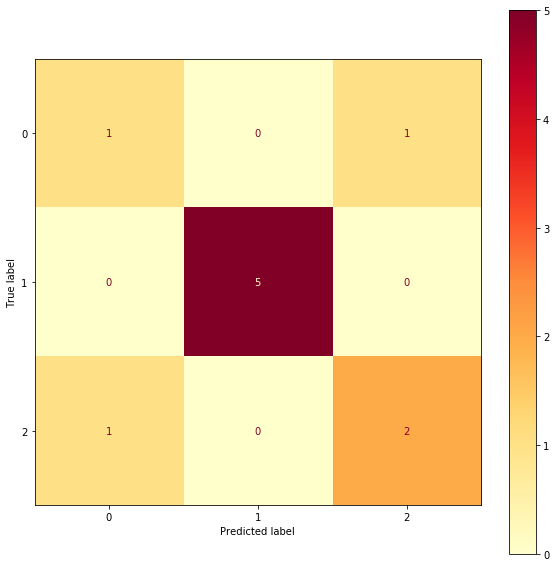

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(xgbmodel,X_test,y_test,cmap="YlOrRd",ax=ax)
plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      1.00      1.00         5
           2       0.67      0.67      0.67         3

    accuracy                           0.80        10
   macro avg       0.72      0.72      0.72        10
weighted avg       0.80      0.80      0.80        10



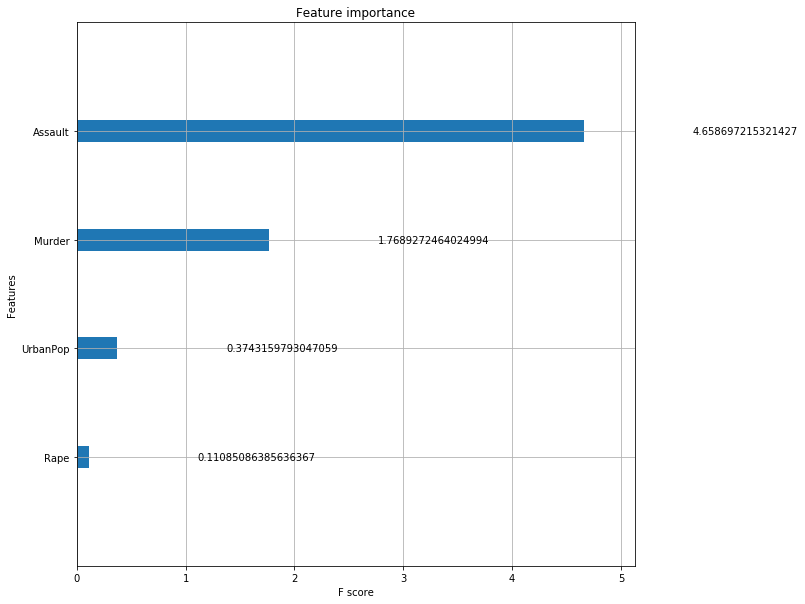

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbmodel,ax=ax,importance_type='gain')
plt.show()

In [28]:
crossv = cross_val_score(xgbmodel,X,y,scoring='f1_micro',cv=5)

In [29]:
crossv

array([0.6, 1. , 0.9, 1. , 0.8])

In [30]:
crossv.mean()

0.86

In [31]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']